In [1]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
medins=pd.read_csv(r"C:\Users\USER\1pythonfiles\datasets\Medical Cost.csv")
medins.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,NaN,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


*Defining the Dataset*

#Finding the factors in calculating Medical Insurance Cost of a person because of many reasons.
#X(Independent) Variables  are age,sex,bmi,children,smoker,region
#Y (Dependent)   variable  is charges
#Here sex,children,smoker,region are categorical variables and age ,bmi and charges are continous variables



#The dataset consists of 7 attributes.6 attributes are independent and considered as input'X' and 1 attribute as output'y'.


In [3]:
#shape of dataset
medins.shape

(1338, 7)

In [4]:
#summary of the dataset
medins.describe()

,age,bmi,children,charges
count,1338.000000,1330.000000,1338.000000,1338.000000
mean,39.207025,30.664289,1.094918,13270.422265
std,14.049960,6.093764,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.656250,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
medins.isnull().any(),medins.isnull().sum()

(age         False
 sex         False
 bmi          True
 children    False
 smoker       True
 region      False
 charges     False
 dtype: bool, age         0
 sex         0
 bmi         8
 children    0
 smoker      3
 region      0
 charges     0
 dtype: int64)

In [6]:
#By the above code ,there are missing values in 2 columns.
#In bmi column there are 8 missisng values and in smoker there are 3 missing values.

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


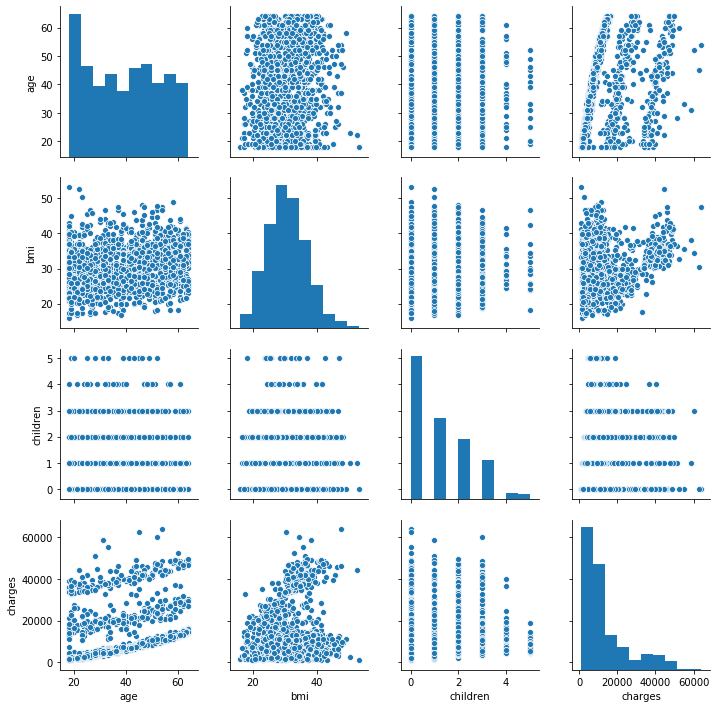

In [7]:
#Categorical Plots: For the variables Sex, Smoker, Region with charges.
#Scatter plot
sns.pairplot(medins)

In [8]:
#By the scatter plot  we can say that there is no realtion between the independent variables.

In [9]:
#replacing bmi missing values with mean
medins['bmi'].mean()
#replacing smoker missing values with mode
medins['smoker'].mode()[0]

'no'

In [10]:
medins['bmi'].fillna(medins['bmi'].mean(),inplace=True)
medins['smoker'].fillna(medins['smoker'].mode()[0],inplace=True)
medins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
medins.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [12]:
##from the above output we can observe that there are no missing values.

In [13]:
#now we want to divide the bmi values into under weight,normal weight and obese.
#also want to convert age into categorical data

In [14]:
medins['bmi'].max(),medins['bmi'].min()

(53.13, 15.96)

In [15]:
medins['age']=pd.cut(medins['age'],bins=[10,20,30,40,50,60,70])
labels=['under-weight','normal-weight','over-weight','obese']
medins['bmi']=pd.cut(medins['bmi'],bins=[0,20,30,50,60],labels=labels)

In [16]:
medins.head(4)

,age,sex,bmi,children,smoker,region,charges
0,"(10, 20]",female,normal-weight,0,yes,southwest,16884.92400
1,"(10, 20]",male,over-weight,1,no,southeast,1725.55230
2,"(20, 30]",male,over-weight,3,no,southeast,4449.46200
3,"(30, 40]",male,normal-weight,0,no,northwest,21984.47061


In [17]:
medins.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [18]:
#checking the value counts for all features

print(medins['age'].value_counts())
print ('-'*80)
print(medins['sex'].value_counts())
print ('-'*80)
print(medins['bmi'].value_counts())
print ('-'*80)
print(medins['children'].value_counts())
print ('-'*80)
print(medins['smoker'].value_counts())
print ('-'*80)
print(medins['region'].value_counts())
print ('-'*80)

(40, 50]    281
(20, 30]    278
(50, 60]    265
(30, 40]    257
(10, 20]    166
(60, 70]     91
Name: age, dtype: int64
--------------------------------------------------------------------------------
male      676
female    662
Name: sex, dtype: int64
--------------------------------------------------------------------------------
over-weight      706
normal-weight    588
under-weight      41
obese              3
Name: bmi, dtype: int64
--------------------------------------------------------------------------------
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
--------------------------------------------------------------------------------
no     1065
yes     273
Name: smoker, dtype: int64
--------------------------------------------------------------------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
--------------------------------------------------------------------------------


### the above output shows the values of the attributes .

#1 : there are more people in age group of [20,30] and [40,50].
#2 : number of males aporoxmately equal to number of females
#3 : there are more number of over weight category people
#4 : More number of people have no children and next the people with one children and it decreases with incresing number of children.
#5 : There are more people who don't smoke.
#6 : there are slightly more people from south east region than other and the people from all the other regions are approximately equal.


##visulaization


#Data Distributon Analysis

Text(0.5, 1.0, 'region')

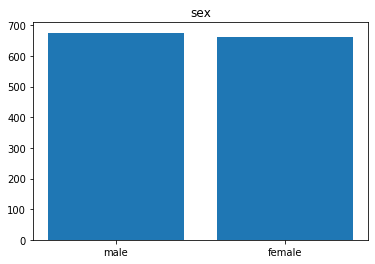

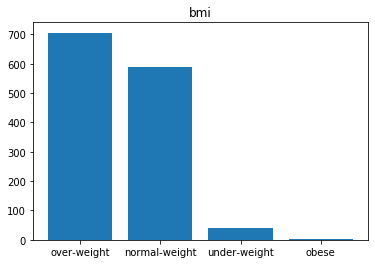

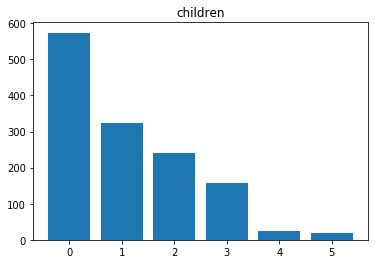

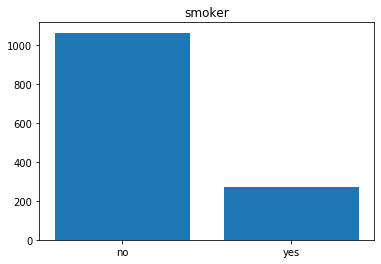

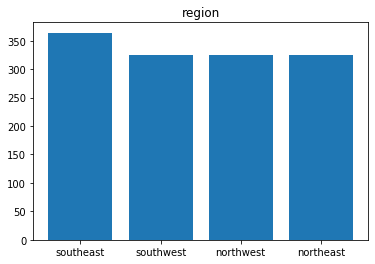

In [19]:
#barplots

plt.figure(1)
plt.bar(medins['sex'].value_counts().index,medins['sex'].value_counts())
plt.title('sex')

plt.figure(2)
plt.bar(medins['bmi'].value_counts().index,medins['bmi'].value_counts())
plt.title('bmi')

plt.figure(3)
plt.bar(medins['children'].value_counts().index,medins['children'].value_counts())
plt.title('children')

plt.figure(4)
plt.bar(medins['smoker'].value_counts().index,medins['smoker'].value_counts())
plt.title('smoker')

plt.figure(5)
plt.bar(medins['region'].value_counts().index,medins['region'].value_counts())
plt.title('region')

#Mean cost analysis

In [20]:
variables = ['sex','smoker','region','age','bmi','children']

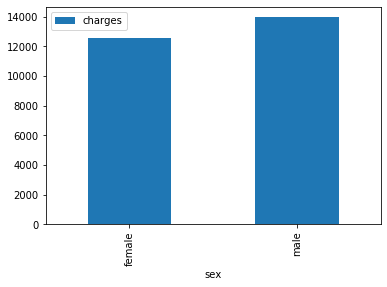

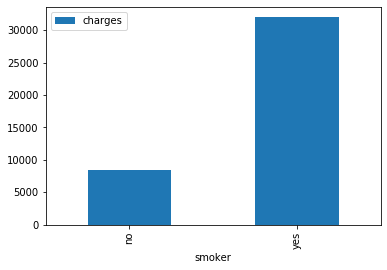

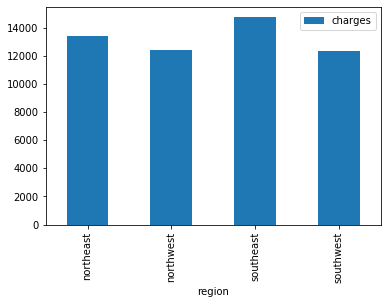

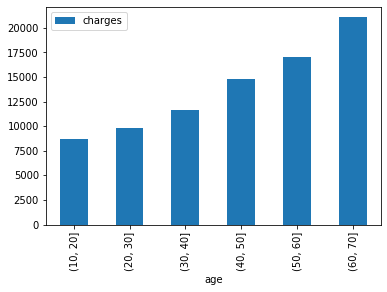

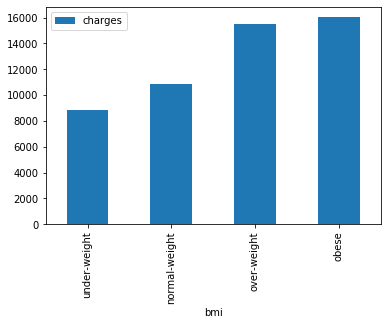

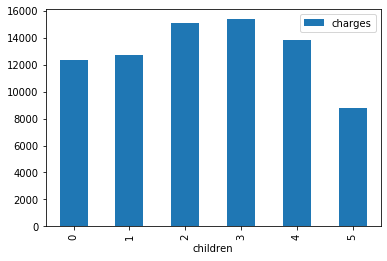

In [21]:
#all variables w.r.t charges

for v in variables:
    group_df = medins.groupby(v).mean()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

In [22]:
#Insurance costs are higher among male population
#Insurance costs are highest among the population of age groups 60-69.
#Insurance costs increases among the smokers
#Insurance costs increases among the obese population
#Insurance costs are higher among the population in southwest region
#Isurance costs are higher among the individuals with 2 or 3 childres.

In [23]:
medins.head(),medins.shape

(        age     sex            bmi  children smoker     region      charges
 0  (10, 20]  female  normal-weight         0    yes  southwest  16884.92400
 1  (10, 20]    male    over-weight         1     no  southeast   1725.55230
 2  (20, 30]    male    over-weight         3     no  southeast   4449.46200
 3  (30, 40]    male  normal-weight         0     no  northwest  21984.47061
 4  (30, 40]    male  normal-weight         0     no  northwest   3866.85520,
 (1338, 7))

In [24]:
x=medins.iloc[:,0:6]
x.head()

,age,sex,bmi,children,smoker,region
0,"(10, 20]",female,normal-weight,0,yes,southwest
1,"(10, 20]",male,over-weight,1,no,southeast
2,"(20, 30]",male,over-weight,3,no,southeast
3,"(30, 40]",male,normal-weight,0,no,northwest
4,"(30, 40]",male,normal-weight,0,no,northwest


In [25]:
x_a=pd.get_dummies(x,columns=['age','sex','bmi','smoker','region'])
x_a.head()

,children,"age_(10, 20]","age_(20, 30]","age_(30, 40]","age_(40, 50]","age_(50, 60]","age_(60, 70]",sex_female,sex_male,bmi_under-weight,bmi_normal-weight,bmi_over-weight,bmi_obese,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,3,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0


In [26]:
x_a.shape

(1338, 19)

In [27]:
#Removing some features which are not usefull
x_a=x_a.drop(columns=['sex_female','smoker_no'])
x_a.shape

(1338, 17)

In [28]:
x_a

,children,"age_(10, 20]","age_(20, 30]","age_(30, 40]","age_(40, 50]","age_(50, 60]","age_(60, 70]",sex_male,bmi_under-weight,bmi_normal-weight,bmi_over-weight,bmi_obese,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,3,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1334,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1335,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1336,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [29]:
x_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 17 columns):
children             1338 non-null int64
age_(10, 20]         1338 non-null uint8
age_(20, 30]         1338 non-null uint8
age_(30, 40]         1338 non-null uint8
age_(40, 50]         1338 non-null uint8
age_(50, 60]         1338 non-null uint8
age_(60, 70]         1338 non-null uint8
sex_male             1338 non-null uint8
bmi_under-weight     1338 non-null uint8
bmi_normal-weight    1338 non-null uint8
bmi_over-weight      1338 non-null uint8
bmi_obese            1338 non-null uint8
smoker_yes           1338 non-null uint8
region_northeast     1338 non-null uint8
region_northwest     1338 non-null uint8
region_southeast     1338 non-null uint8
region_southwest     1338 non-null uint8
dtypes: int64(1), uint8(16)
memory usage: 31.5 KB


# Developing a model

### Decision Tree  Regressor

In [68]:
from sklearn.model_selection import train_test_split
x=x_a
y=medins['charges']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [69]:
x_train.shape,x_test.shape

((1070, 17), (268, 17))

In [70]:
y_train.shape,y_test.shape

((1070,), (268,))

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


dt=DecisionTreeRegressor(criterion= 'mse',
                         max_depth= 5,
                         max_features='auto')

dt.fit(x_train,y_train)

#prediction
y_pred1=dt.predict(x_test)
r2_score(y_test,y_pred1)

0.8092215844842297

### Real time prediction

In [72]:
x_train.columns

Index(['children', 'age_(10, 20]', 'age_(20, 30]', 'age_(30, 40]',
       'age_(40, 50]', 'age_(50, 60]', 'age_(60, 70]', 'sex_male',
       'bmi_under-weight', 'bmi_normal-weight', 'bmi_over-weight', 'bmi_obese',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [73]:
x_train.head()

,children,"age_(10, 20]","age_(20, 30]","age_(30, 40]","age_(40, 50]","age_(50, 60]","age_(60, 70]",sex_male,bmi_under-weight,bmi_normal-weight,bmi_over-weight,bmi_obese,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
911,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0
769,2,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
961,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
863,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
648,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


column::column name       

 0       children 
 
 1       age_(10, 20]         
 2       age_(20, 30]        
 3       age_(30, 40]         
 4       age_(40, 50]        
 5       age_(50, 60]         
 6       age_(60, 70]  
 
 7       sex_male  
 
 8       bmi_under-weight     
 9       bmi_normal-weight    
10       bmi_over-weight      
11       bmi_obese    

12       smoker_yes    

13       region_northeast     
14       region_northwest     
15       region_southeast     
16       region_southwest    


options for children        : [0,1,2,3,4,5],  
options for other features  :;:  0 or 1

In [74]:
   #age	 sex	bmi 	children	smoker 	 region 	charges
    
#0	19	female	27.900	  0 	     yes  	southwest	16884.92400

sample1=np.array([[0,  1,0,0,0,0,0,  0,   0,1,0,0,  1,  0,0,0,1  ]])
sample1

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]])

In [75]:
dt.predict(sample1)

array([19630.64130467])

In [76]:
    #age	 sex	bmi 	children	smoker 	 region 	charges
#8	37  	male	29.830	    2   	  no 	northeast	6406.41070
sample2=np.array([[2,  0,0,1,0,0,0,  1,   0,1,0,0,  0,  1,0,0,0  ]])
sample2

array([[2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]])

In [77]:
dt.predict(sample2)

array([6461.11150729])

In [78]:
y_test=y_test.values
y_pred=dt.predict(x_test)
pd.DataFrame({"Actual":y_test ,"Predicted" :y_pred})

,Actual,Predicted
0,6059.17300,6461.111507
1,10214.63600,11153.395188
2,1625.43375,3832.230573
3,34472.84100,38457.203465
4,11842.62375,11755.580292
...,...,...
263,4934.70500,6461.111507
264,7243.81360,6461.111507
265,8520.02600,8936.306315
266,7731.85785,8936.306315


### Conclusion 

Here, we predicted the medical insurance cost based on many factors by using the Decision Tree Regressor with accuracy of 80%.